In [1]:
from tensorflow.keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.utils import normalize,plot_model
from tensorflow.keras import backend as K
from keras.datasets import mnist
from tqdm import tqdm
import numpy as np

Using TensorFlow backend.


In [2]:
# load data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# normalize data
X_train = normalize(X_train,axis=-1)
X_test = normalize(X_test,axis=-1)

# print size of data
print("X_train size:",X_train.shape)
print("y_train size:",y_train.shape)
print("X_test size:",X_test.shape)
print("y_test size:",y_test.shape)

X_train size: (60000, 28, 28)
y_train size: (60000,)
X_test size: (10000, 28, 28)
y_test size: (10000,)


In [3]:
# make pairs between data, for each image will take an pair positive and negative
def make_pairs(x,y):
    num_classes = np.max(y) + 1
    indices = [np.where(y == i)[0] for i in range(num_classes)]
    x_pairs = []
    labels = []
    
    for dx,i in tqdm(zip(indices,range(len(indices)))):
        for dy,j in zip(dx,range(len(dx))):
            # pair between positive and positive (2 samples has same class)
            x_pairs += [[x[dy],x[dx[j-1]]]]
            labels.append(1)

            # pair between positive and negative (2 samples has different class)
            while True:
                not_i = np.random.randint(num_classes)
                if not_i != i: 
                    break
            x_pairs += [[x[dy],x[np.random.choice(indices[not_i])]]]
            labels.append(0)
    
    return np.array(x_pairs),np.array(labels)

tr_pairs,tr_labels = make_pairs(X_train,y_train)
te_pairs,te_labels = make_pairs(X_test,y_test)

del X_train,y_train,X_test,y_test

10it [00:01,  5.47it/s]
10it [00:00, 39.35it/s]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
flatten_input (InputLayer)      [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_1_input (InputLayer)    [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 784)          0           flatten_input[0][0]              
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           flatten_1_input[0][0]            
______________________________________________________________________________________________

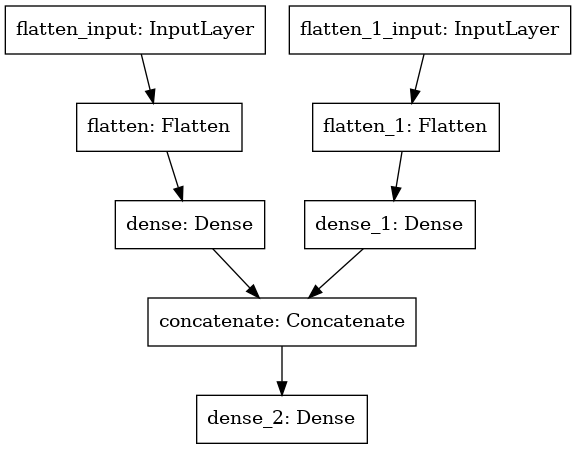

In [4]:
# Weights not shared
seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)

model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
plot_model(model)

In [5]:
model.fit([tr_pairs[:,0],tr_pairs[:,1]],tr_labels[:],batch_size=32,epochs= 10)

Epoch 1/10
3750/3750 [==============================] - 51s 13ms/step - loss: 0.6942 - accuracy: 0.5041
Epoch 2/10
3750/3750 [==============================] - 46s 12ms/step - loss: 0.6931 - accuracy: 0.5074
Epoch 3/10
3750/3750 [==============================] - 44s 12ms/step - loss: 0.6930 - accuracy: 0.5068
Epoch 4/10
3750/3750 [==============================] - 45s 12ms/step - loss: 0.6929 - accuracy: 0.5086
Epoch 5/10
3750/3750 [==============================] - 44s 12ms/step - loss: 0.6929 - accuracy: 0.5092
Epoch 6/10
3750/3750 [==============================] - 44s 12ms/step - loss: 0.6927 - accuracy: 0.5116
Epoch 7/10
3750/3750 [==============================] - 46s 12ms/step - loss: 0.6926 - accuracy: 0.5129
Epoch 8/10
3750/3750 [==============================] - 43s 12ms/step - loss: 0.6924 - accuracy: 0.5131
Epoch 9/10
3750/3750 [==============================] - 42s 11ms/step - loss: 0.6923 - accuracy: 0.5158
Epoch 10/10
3750/3750 [==============================] - 42s 11m

In [6]:
# Weights shared
input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
dense1 = dense(input1)

input2 = Input((28,28))
dense2 = dense(input2)

merge_layer = Concatenate()([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1,input2], outputs=dense_layer)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128)          100480      input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 256)          0           model_1[1][0]              

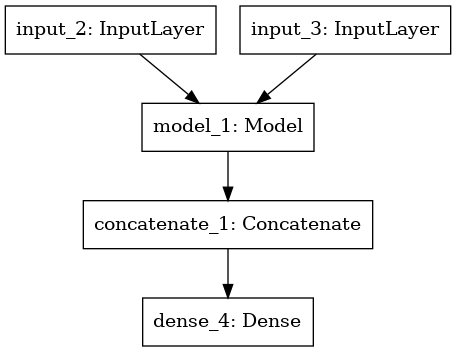

In [7]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
plot_model(model)

In [8]:
model.fit([tr_pairs[:,0],tr_pairs[:,1]],tr_labels[:],batch_size=32,epochs= 10)

Epoch 1/10
3750/3750 [==============================] - 48s 13ms/step - loss: 0.6938 - accuracy: 0.5013
Epoch 2/10
3750/3750 [==============================] - 42s 11ms/step - loss: 0.6930 - accuracy: 0.5056
Epoch 3/10
3750/3750 [==============================] - 41s 11ms/step - loss: 0.6929 - accuracy: 0.5037
Epoch 4/10
3750/3750 [==============================] - 43s 11ms/step - loss: 0.6928 - accuracy: 0.5051
Epoch 5/10
3750/3750 [==============================] - 45s 12ms/step - loss: 0.6928 - accuracy: 0.5073
Epoch 6/10
3750/3750 [==============================] - 43s 12ms/step - loss: 0.6927 - accuracy: 0.5139
Epoch 7/10
3750/3750 [==============================] - 34s 9ms/step - loss: 0.6926 - accuracy: 0.5121
Epoch 8/10
3750/3750 [==============================] - 37s 10ms/step - loss: 0.6925 - accuracy: 0.5134
Epoch 9/10
3750/3750 [==============================] - 40s 11ms/step - loss: 0.6924 - accuracy: 0.5106
Epoch 10/10
3750/3750 [==============================] - 43s 11ms

In [21]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

input = Input((28,28))
x = Flatten()(input)
x = Dense(256, activation='relu')(x)
dense = Model(input, x)
dense.summary()

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               200960    
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________


Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
model_8 (Model)                 (None, 256)          200960      input_14[0][0]                   
                                                                 input_15[0][0]                   
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 1)            0           model_8[1][0]              

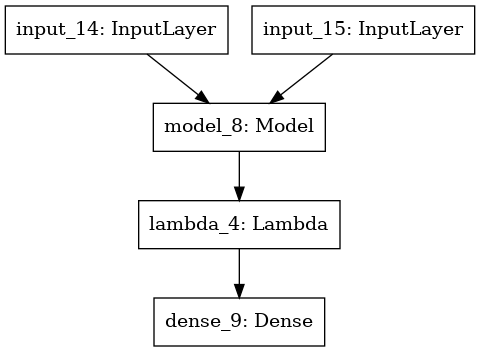

In [24]:
model.compile(loss = "binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model.summary()
plot_model(model)

In [12]:
history=model.fit([tr_pairs[:,0],tr_pairs[:,1]],tr_labels,batch_size=5000,epochs= 40)

Epoch 1/40
24/24 [==============================] - 19s 787ms/step - loss: 0.2500 - accuracy: 0.9001
Epoch 2/40
24/24 [==============================] - 19s 781ms/step - loss: 0.2500 - accuracy: 0.9000
Epoch 3/40
24/24 [==============================] - 19s 810ms/step - loss: 0.2499 - accuracy: 0.9002
Epoch 4/40
24/24 [==============================] - 19s 785ms/step - loss: 0.2499 - accuracy: 0.9001
Epoch 5/40
24/24 [==============================] - 19s 794ms/step - loss: 0.2498 - accuracy: 0.9002
Epoch 6/40
24/24 [==============================] - 19s 795ms/step - loss: 0.2497 - accuracy: 0.9003
Epoch 7/40
24/24 [==============================] - 20s 833ms/step - loss: 0.2497 - accuracy: 0.9003
Epoch 8/40
24/24 [==============================] - 19s 808ms/step - loss: 0.2497 - accuracy: 0.9003
Epoch 9/40
24/24 [==============================] - 19s 793ms/step - loss: 0.2496 - accuracy: 0.9004
Epoch 10/40
24/24 [==============================] - 20s 836ms/step - loss: 0.2495 - accura

In [9]:
model.save("mnist")

In [5]:
model = load_model("mnist")

In [10]:
def prediction(x1,x2):
    res = model.predict([x1,x2])
    counter = 0
    for i in range(0,res.shape[0],2):
        if res[i][0] >= 0.5:
            counter += 1
        if res[i+1][0] < 0.5:
            counter += 1
    return counter/res.shape[0]*100

In [13]:
train_accuracy = prediction(tr_pairs[:,0],tr_pairs[:,1])
test_accuracy = prediction(te_pairs[:,0],te_pairs[:,1])

print("training accuracy:",train_accuracy,"%")
print("test accuracy:",test_accuracy,"%")

training accuracy: 90.095 %
test accuracy: 89.67 %
